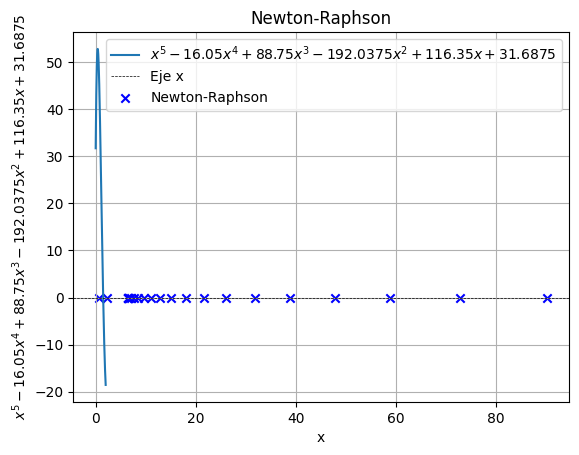

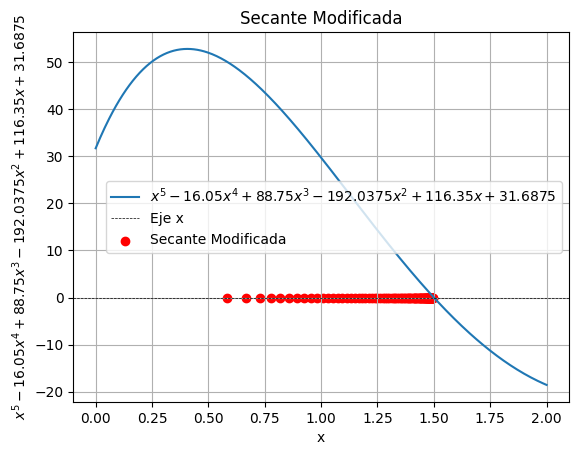

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir la variable simbólica
x = sp.symbols('x')

# Definir la función f(x)
f = x**5 - 16.05*x**4 + 88.75*x**3 - 192.0375*x**2 + 116.35*x + 31.6875

# Derivar la función f(x)
df = sp.diff(f, x)

# Convertir la función f(x) y su derivada df(x) a funciones numéricas
f_numeric = sp.lambdify(x, f, 'numpy')
df_numeric = sp.lambdify(x, df, 'numpy')

def newton_raphson_method(x0, tol, max_iter):
    x_values = [x0]
    iter_count = 0

    while iter_count < max_iter:
        x_new = x_values[-1] - f_numeric(x_values[-1]) / df_numeric(x_values[-1])
        x_values.append(x_new)

        if abs(x_new - x_values[-2]) < tol:
            return x_values, iter_count + 1

        iter_count += 1

    return x_values, iter_count + 1

def modified_secant_method(x0, delta, tol, max_iter):
    x_values = [x0]
    iter_count = 0

    while iter_count < max_iter:
        f_x = f_numeric(x_values[-1])
        df_x = df_numeric(x_values[-1])

        if abs(df_x) < 1e-10:
            return x_values, iter_count + 1

        x_new = x_values[-1] - delta * f_x / df_x
        x_values.append(x_new)

        if abs(x_new - x_values[-2]) < tol:
            return x_values, iter_count + 1

        iter_count += 1

    return x_values, iter_count + 1

# Parámetros iniciales
x0 = 0.5825
tolerancia = 1e-4
max_iteraciones = 100
delta_secante = 0.05

try:
    # Llamada al método de Newton-Raphson
    iteraciones_newton, _ = newton_raphson_method(x0, tolerancia, max_iteraciones)

    # Graficar iteraciones de Newton-Raphson
    x_values = np.linspace(0, 2, 400)
    y_values = f_numeric(x_values)

    plt.figure()
    plt.plot(x_values, y_values, label='$x^5 - 16.05x^4 + 88.75x^3 - 192.0375x^2 + 116.35x + 31.6875$')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='Eje x')
    plt.scatter(iteraciones_newton, [0] * len(iteraciones_newton), color='blue', label='Newton-Raphson', marker='x')
    plt.title('Newton-Raphson')
    plt.xlabel('x')
    plt.ylabel('$x^5 - 16.05x^4 + 88.75x^3 - 192.0375x^2 + 116.35x + 31.6875$')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(e)

try:
    # Llamada al método de la secante modificada
    iteraciones_secante, _ = modified_secant_method(x0, delta_secante, tolerancia, max_iteraciones)

    # Graficar iteraciones de Secante Modificada
    x_values = np.linspace(0, 2, 400)
    y_values = f_numeric(x_values)

    plt.figure()
    plt.plot(x_values, y_values, label='$x^5 - 16.05x^4 + 88.75x^3 - 192.0375x^2 + 116.35x + 31.6875$')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='Eje x')
    plt.scatter(iteraciones_secante, [0] * len(iteraciones_secante), color='red', label='Secante Modificada', marker='o')
    plt.title('Secante Modificada')
    plt.xlabel('x')
    plt.ylabel('$x^5 - 16.05x^4 + 88.75x^3 - 192.0375x^2 + 116.35x + 31.6875$')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(e)
